# Summer Report
### Paul Yollin

## Introduction

In this report I will plot graphs showing the reduction factor as a
function of external expansion order while using SSS filtering
(mne.preprocessing.maxwell_filter()). I will show the difference between
running the default maxwell_filter() and running maxwell_filter() while
specifying the fine calibration of the specific MEG machine. 

Thing to keep in mind while trying to duplicate these results. I am
applying these scripts to five different MEG recordings. One is an 
empty room recording of which I use the entire file in my calculation of
reduction factor. Then four different recordings attempting to expose
eddy currents, if they are present. Each of these recordings, named
eddy current recordings, are roughly two minute recordings each with
a generated magnetic field from a current loop in the corner of the room.
Each eddy current recording was at a different frequency, as there is a 
frequency dependence to the strength of generated eddy currents, but no
frequency dependence for the strength of the generate signal. For these eddy current
measurements I use the cleanest 40 seconds for calculating the reduction
factor. These times are specified in the python dictionary named
'params' under indexes start and stop.

After plotting the reduction factors over external expansion order I
looked at how internal expansion order effects the reduction factors.
For this I plotted the dataframes, and then looked at the box plot
of their distributions.

In [24]:
#   import needed packages, and import FunFile as Fun
#       for more info on FunFile view my github
#       https://github.com/pyollin/I-Labs-Research/blob/master/Funfile.py
import Funfile as Fun
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#   Creating the dictionary 'params' to hold import values to be used
params = {
    'f_ext': 'Hz_10v_erm_raw.fif',
    '5': {'start': 80, 'stop': 120},
    '20': {'start': 0, 'stop': 40},
    '70': {'start': 70, 'stop': 110},
    '105': {'start': 65, 'stop': 105},
    'erm': {'start': 0, 'stop': 306}
}

#   this vector specifies the external expansions used
xs = np.arange(1,8)

In order to stream line the code I calculated the reduction order of each
recording as a function of internal and external expansion order and saved
these as data frames in csv files. These csv files cna be found on my github,
the script used to calculate and save these csv files (DatFile.py) can also
be found on my github.

In the following code chunk I am reading the csv files into panda data frames.

In [25]:
path_to_csv = '/Users/pjyol/OneDrive/Documents/I-Labs/ReducFac/'

drop_5 = {
    'mdf': pd.read_csv(
        path_to_csv + '5Hz_Drops_mdf.csv',
        index_col=0
    ),
    'mcdf': pd.read_csv(
        path_to_csv + '5Hz_Drops_mcdf.csv',
        index_col=0
    ),
    'gdf': pd.read_csv(
        path_to_csv + '5Hz_Drops_gdf.csv',
        index_col=0
    ),
    'gcdf': pd.read_csv(
        path_to_csv + '5Hz_Drops_gcdf.csv',
        index_col=0
    )
}

drop_20 = {
    'mdf': pd.read_csv(
        path_to_csv + '20Hz_Drops_mdf.csv',
        index_col=0
    ),
    'mcdf': pd.read_csv(
        path_to_csv + '20Hz_Drops_mcdf.csv',
        index_col=0
    ),
    'gdf': pd.read_csv(
        path_to_csv + '20Hz_Drops_gdf.csv',
        index_col=0
    ),
    'gcdf': pd.read_csv(
        path_to_csv + '20Hz_Drops_gcdf.csv',
        index_col=0
    )
}

drop_70 = {
    'mdf': pd.read_csv(
        path_to_csv + '70Hz_Drops_mdf.csv',
        index_col=0
    ),
    'mcdf': pd.read_csv(
        path_to_csv + '70Hz_Drops_mcdf.csv',
        index_col=0
    ),
    'gdf': pd.read_csv(
        path_to_csv + '70Hz_Drops_gdf.csv',
        index_col=0
    ),
    'gcdf': pd.read_csv(
        path_to_csv + '70Hz_Drops_gcdf.csv',
        index_col=0
    )
}

drop_105 = {
    'mdf': pd.read_csv(
        path_to_csv + '105Hz_Drops_mdf.csv',
        index_col=0
    ),
    'mcdf': pd.read_csv(
        path_to_csv + '105Hz_Drops_mcdf.csv',
        index_col=0
    ),
    'gdf': pd.read_csv(
        path_to_csv + '105Hz_Drops_gdf.csv',
        index_col=0
    ),
    'gcdf': pd.read_csv(
        path_to_csv + '105Hz_Drops_gcdf.csv',
        index_col=0
    )
}

drop_erm = {
    'mdf': pd.read_csv(
        path_to_csv + 'erm_Drops_mdf.csv',
        index_col=0
    ),
    'mcdf': pd.read_csv(
        path_to_csv + 'ermHz_Drops_mcdf.csv',
        index_col=0
    ),
    'gdf': pd.read_csv(
        path_to_csv + 'ermHz_Drops_gdf.csv',
        index_col=0
    ),
    'gcdf': pd.read_csv(
        path_to_csv + 'ermHz_Drops_gcdf.csv',
        index_col=0
    )
}

## Empty Room Recording

Here I am plotting reduction factors while using SSS filtering
both $\color{blue}{\text{with}}$ and $\color{red}{\text{without}}$
using a fine calibration file. Internal expansion order is set to the
lowest possible value, one.


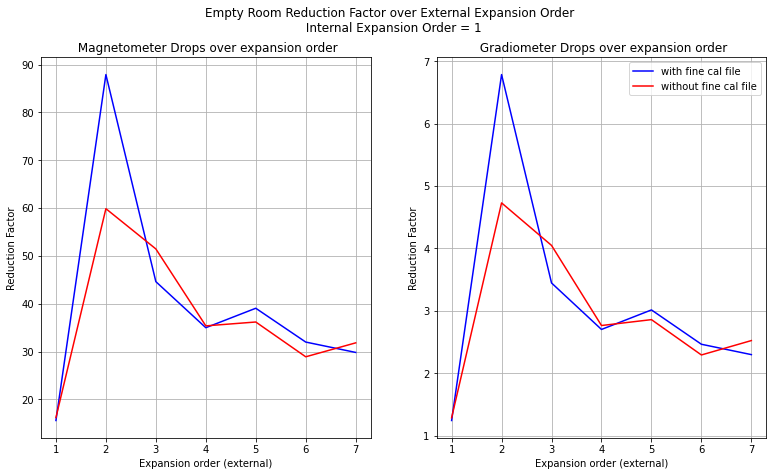

In [26]:
fig, ax = plt.subplots(1, 2, figsize=(13, 7))

data = drop_erm
int_exp = 1

fig.suptitle('Empty Room Reduction Factor over External Expansion Order \n '
             'Internal Expansion Order = ' + str(int_exp))

ax[0].plot(data['mcdf'].loc[int_exp, :], 'b')
ax[0].plot(data['mdf'].loc[int_exp, :], 'r')
ax[1].plot(data['gcdf'].loc[int_exp, :], 'b')
ax[1].plot(data['gdf'].loc[int_exp, :], 'r')
plt.legend(('with fine cal file', 'without fine cal file'))
ax[0].set(title=' Magnetometer Drops over expansion order',
          xlabel='Expansion order (external)',
          ylabel='Reduction Factor')
ax[1].set(title=' Gradiometer Drops over expansion order',
          xlabel='Expansion order (external)',
          ylabel='Reduction Factor')
ax[0].grid()
ax[1].grid()

del int_exp

### Increasing Internal Expansion Order

Here I am plotting reduction factor over external expansion order
but varying the internal expansion to two and three

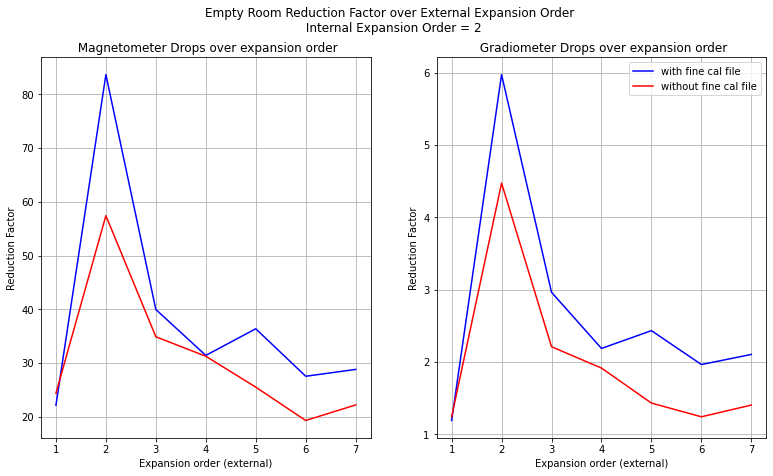

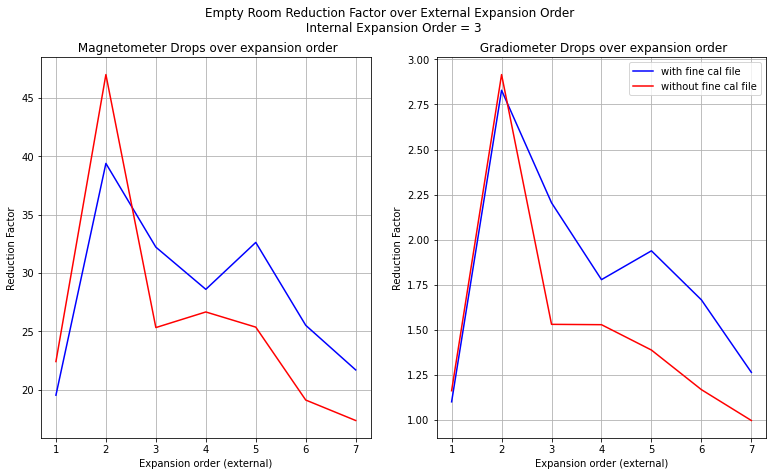

In [27]:
fig, ax = plt.subplots(1, 2, figsize=(13, 7))

int_exp = 2

fig.suptitle('Empty Room Reduction Factor over External Expansion Order \n '
             'Internal Expansion Order = ' + str(int_exp))

ax[0].plot(data['mcdf'].loc[int_exp, :], 'b')
ax[0].plot(data['mdf'].loc[int_exp, :], 'r')
ax[1].plot(data['gcdf'].loc[int_exp, :], 'b')
ax[1].plot(data['gdf'].loc[int_exp, :], 'r')
plt.legend(('with fine cal file', 'without fine cal file'))
ax[0].set(title=' Magnetometer Drops over expansion order',
          xlabel='Expansion order (external)',
          ylabel='Reduction Factor')
ax[1].set(title=' Gradiometer Drops over expansion order',
          xlabel='Expansion order (external)',
          ylabel='Reduction Factor')
ax[0].grid()
ax[1].grid()

del int_exp

fig, ax = plt.subplots(1, 2, figsize=(13, 7))

int_exp = 3

fig.suptitle('Empty Room Reduction Factor over External Expansion Order \n '
             'Internal Expansion Order = ' + str(int_exp))

ax[0].plot(data['mcdf'].loc[int_exp, :], 'b')
ax[0].plot(data['mdf'].loc[int_exp, :], 'r')
ax[1].plot(data['gcdf'].loc[int_exp, :], 'b')
ax[1].plot(data['gdf'].loc[int_exp, :], 'r')
plt.legend(('with fine cal file', 'without fine cal file'))
ax[0].set(title=' Magnetometer Drops over expansion order',
          xlabel='Expansion order (external)',
          ylabel='Reduction Factor')
ax[1].set(title=' Gradiometer Drops over expansion order',
          xlabel='Expansion order (external)',
          ylabel='Reduction Factor')
ax[0].grid()
ax[1].grid()

del data, int_exp

### DataFrame analysis

In order to visualize the effect of increasing the internal expansion order
I plot the imported csv dataframes.

[Text(0.5, 1.0, ' Gradiometer Drops over expansion order'),
 Text(0.5, 0, 'Expansion order (internal)'),
 Text(0, 0.5, 'Reduction Factor')]

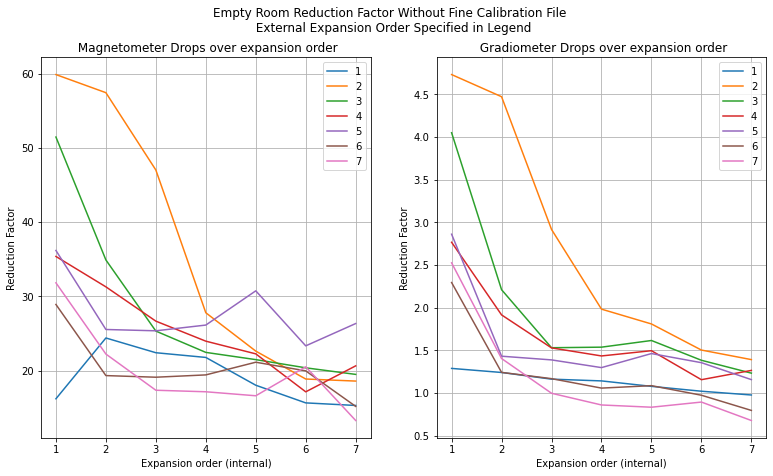

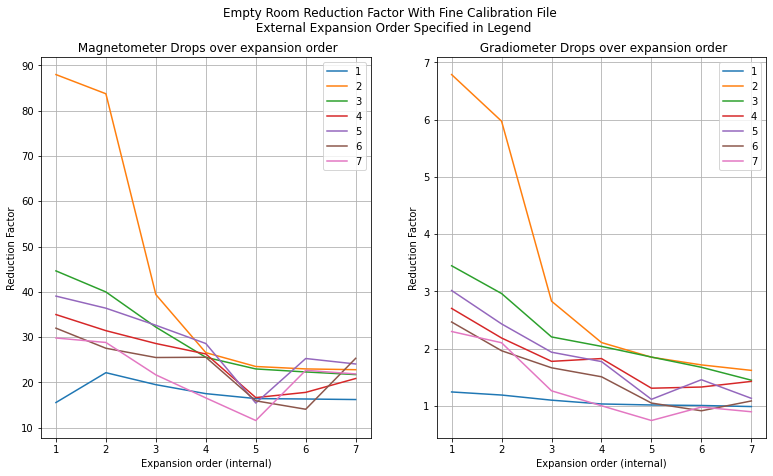

In [28]:
fig, ax = plt.subplots(1, 2, figsize=(13, 7))

fig.suptitle('Empty Room Reduction Factor Without Fine Calibration File \n '
             'External Expansion Order Specified in Legend')

drop_erm['mdf'].plot(
    ax=ax[0],
    kind='line',
    grid=True,
)
drop_erm['gdf'].plot(
    ax=ax[1],
    kind='line',
    grid=True,
)
ax[0].set(title=' Magnetometer Drops over expansion order',
       xlabel='Expansion order (internal)',
       ylabel='Reduction Factor')
ax[1].set(title=' Gradiometer Drops over expansion order',
       xlabel='Expansion order (internal)',
       ylabel='Reduction Factor')

fig, ax = plt.subplots(1, 2, figsize=(13, 7))

fig.suptitle('Empty Room Reduction Factor With Fine Calibration File \n '
             'External Expansion Order Specified in Legend')

drop_erm['mcdf'].plot(
    ax=ax[0],
    kind='line',
    grid=True,
)
drop_erm['gcdf'].plot(
    ax=ax[1],
    kind='line',
    grid=True,
)
ax[0].set(title=' Magnetometer Drops over expansion order',
       xlabel='Expansion order (internal)',
       ylabel='Reduction Factor')
ax[1].set(title=' Gradiometer Drops over expansion order',
       xlabel='Expansion order (internal)',
       ylabel='Reduction Factor')

Examining the same DataFrames plotted as box plots

[Text(0.5, 1.0, ' Gradiometer Drops over expansion order'),
 Text(0.5, 0, 'Expansion order (internal)'),
 Text(0, 0.5, 'Reduction Factor')]

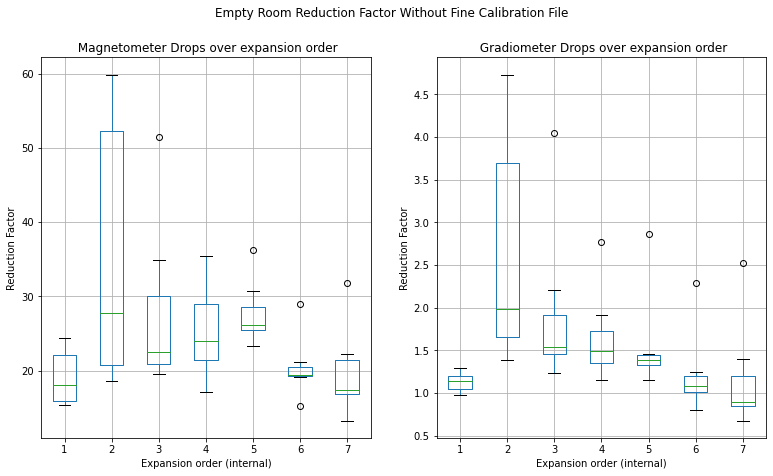

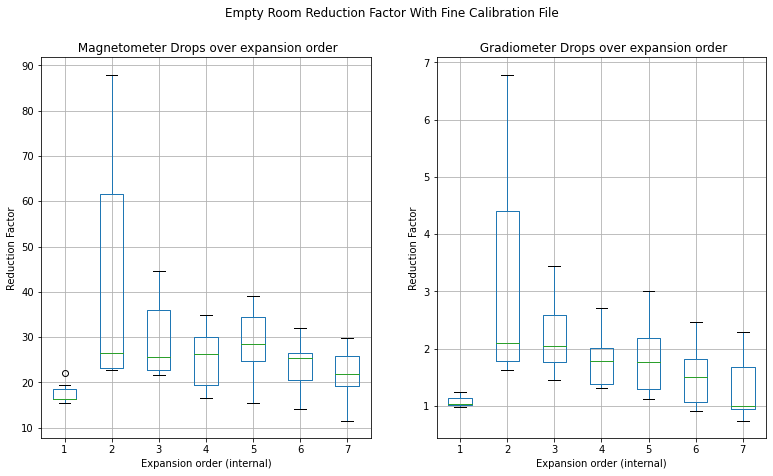

In [29]:
fig, ax = plt.subplots(1, 2, figsize=(13, 7))

fig.suptitle('Empty Room Reduction Factor Without Fine Calibration File')

drop_erm['mdf'].plot(
    ax=ax[0],
    kind='box',
    grid=True,
)
drop_erm['gdf'].plot(
    ax=ax[1],
    kind='box',
    grid=True,
)
ax[0].set(title=' Magnetometer Drops over expansion order',
       xlabel='Expansion order (internal)',
       ylabel='Reduction Factor')
ax[1].set(title=' Gradiometer Drops over expansion order',
       xlabel='Expansion order (internal)',
       ylabel='Reduction Factor')

fig, ax = plt.subplots(1, 2, figsize=(13, 7))

fig.suptitle('Empty Room Reduction Factor With Fine Calibration File')

drop_erm['mcdf'].plot(
    ax=ax[0],
    kind='box',
    grid=True,
)
drop_erm['gcdf'].plot(
    ax=ax[1],
    kind='box',
    grid=True,
)
ax[0].set(title=' Magnetometer Drops over expansion order',
       xlabel='Expansion order (internal)',
       ylabel='Reduction Factor')
ax[1].set(title=' Gradiometer Drops over expansion order',
       xlabel='Expansion order (internal)',
       ylabel='Reduction Factor')

## 5Hz recording

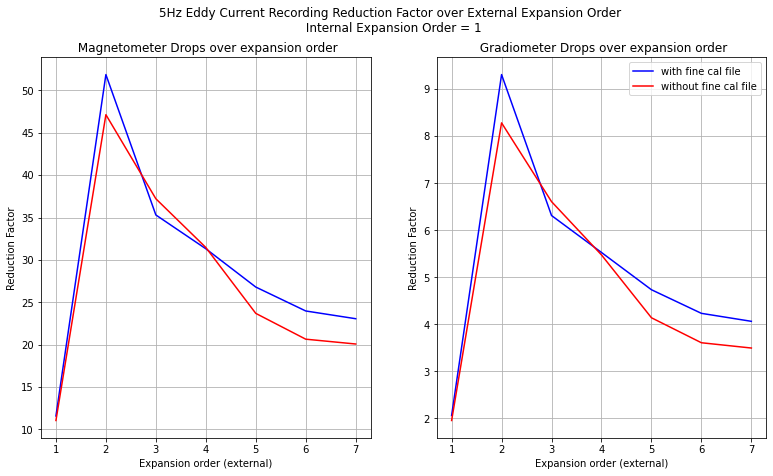

In [30]:
fig, ax = plt.subplots(1, 2, figsize=(13, 7))

data = drop_5
int_exp = 1

fig.suptitle('5Hz Eddy Current Recording Reduction Factor over External Expansion Order \n '
             'Internal Expansion Order = ' + str(int_exp))

ax[0].plot(data['mcdf'].loc[int_exp, :], 'b')
ax[0].plot(data['mdf'].loc[int_exp, :], 'r')
ax[1].plot(data['gcdf'].loc[int_exp, :], 'b')
ax[1].plot(data['gdf'].loc[int_exp, :], 'r')
plt.legend(('with fine cal file', 'without fine cal file'))
ax[0].set(title=' Magnetometer Drops over expansion order',
          xlabel='Expansion order (external)',
          ylabel='Reduction Factor')
ax[1].set(title=' Gradiometer Drops over expansion order',
          xlabel='Expansion order (external)',
          ylabel='Reduction Factor')
ax[0].grid()
ax[1].grid()

del int_exp

### Increasing Internal Expansion Order

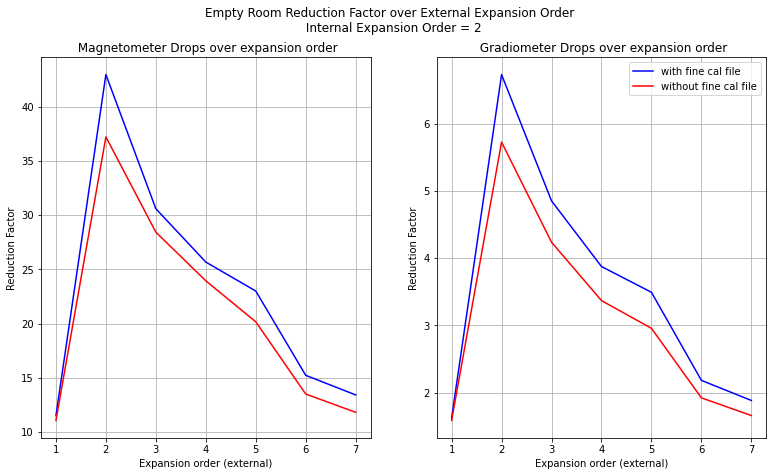

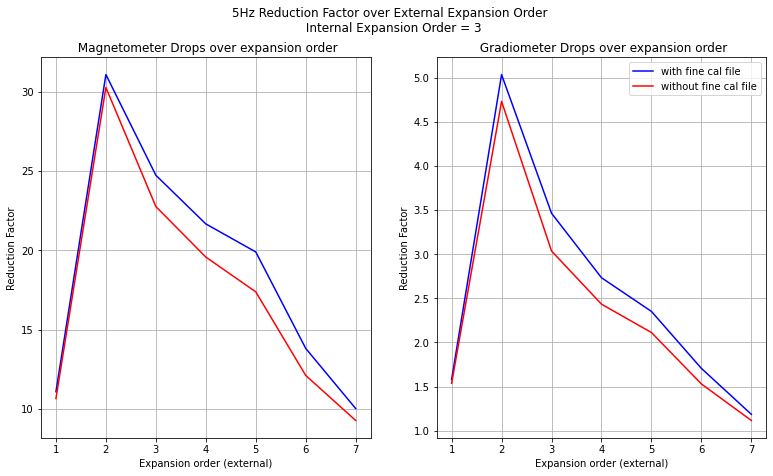

In [31]:
fig, ax = plt.subplots(1, 2, figsize=(13, 7))

int_exp = 2

fig.suptitle('Empty Room Reduction Factor over External Expansion Order \n '
             'Internal Expansion Order = ' + str(int_exp))

ax[0].plot(data['mcdf'].loc[int_exp, :], 'b')
ax[0].plot(data['mdf'].loc[int_exp, :], 'r')
ax[1].plot(data['gcdf'].loc[int_exp, :], 'b')
ax[1].plot(data['gdf'].loc[int_exp, :], 'r')
plt.legend(('with fine cal file', 'without fine cal file'))
ax[0].set(title=' Magnetometer Drops over expansion order',
          xlabel='Expansion order (external)',
          ylabel='Reduction Factor')
ax[1].set(title=' Gradiometer Drops over expansion order',
          xlabel='Expansion order (external)',
          ylabel='Reduction Factor')
ax[0].grid()
ax[1].grid()

del int_exp

fig, ax = plt.subplots(1, 2, figsize=(13, 7))

int_exp = 3

fig.suptitle('5Hz Reduction Factor over External Expansion Order \n '
             'Internal Expansion Order = ' + str(int_exp))

ax[0].plot(data['mcdf'].loc[int_exp, :], 'b')
ax[0].plot(data['mdf'].loc[int_exp, :], 'r')
ax[1].plot(data['gcdf'].loc[int_exp, :], 'b')
ax[1].plot(data['gdf'].loc[int_exp, :], 'r')
plt.legend(('with fine cal file', 'without fine cal file'))
ax[0].set(title=' Magnetometer Drops over expansion order',
          xlabel='Expansion order (external)',
          ylabel='Reduction Factor')
ax[1].set(title=' Gradiometer Drops over expansion order',
          xlabel='Expansion order (external)',
          ylabel='Reduction Factor')
ax[0].grid()
ax[1].grid()

del data, int_exp

### DataFrame analysis

[Text(0.5, 1.0, ' Gradiometer Drops over expansion order'),
 Text(0.5, 0, 'Expansion order (internal)'),
 Text(0, 0.5, 'Reduction Factor')]

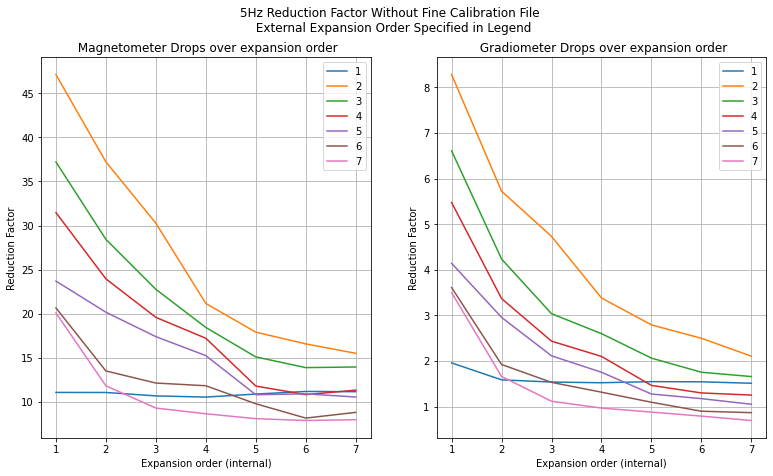

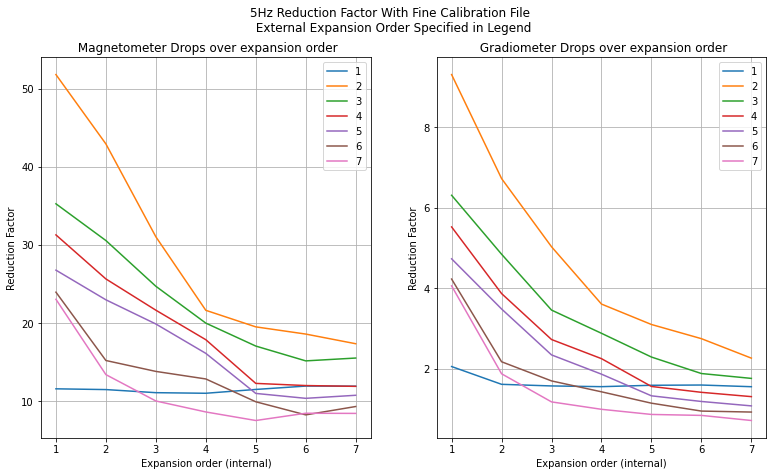

In [32]:
fig, ax = plt.subplots(1, 2, figsize=(13, 7))

fig.suptitle('5Hz Reduction Factor Without Fine Calibration File \n '
             'External Expansion Order Specified in Legend')

drop_5['mdf'].plot(
    ax=ax[0],
    kind='line',
    grid=True,
)
drop_5['gdf'].plot(
    ax=ax[1],
    kind='line',
    grid=True,
)
ax[0].set(title=' Magnetometer Drops over expansion order',
       xlabel='Expansion order (internal)',
       ylabel='Reduction Factor')
ax[1].set(title=' Gradiometer Drops over expansion order',
       xlabel='Expansion order (internal)',
       ylabel='Reduction Factor')

fig, ax = plt.subplots(1, 2, figsize=(13, 7))

fig.suptitle('5Hz Reduction Factor With Fine Calibration File \n '
             'External Expansion Order Specified in Legend')

drop_5['mcdf'].plot(
    ax=ax[0],
    kind='line',
    grid=True,
)
drop_5['gcdf'].plot(
    ax=ax[1],
    kind='line',
    grid=True,
)
ax[0].set(title=' Magnetometer Drops over expansion order',
       xlabel='Expansion order (internal)',
       ylabel='Reduction Factor')
ax[1].set(title=' Gradiometer Drops over expansion order',
       xlabel='Expansion order (internal)',
       ylabel='Reduction Factor')

Examining the same DataFrames plotted as box plots

[Text(0.5, 1.0, ' Gradiometer Drops over expansion order'),
 Text(0.5, 0, 'Expansion order (internal)'),
 Text(0, 0.5, 'Reduction Factor')]

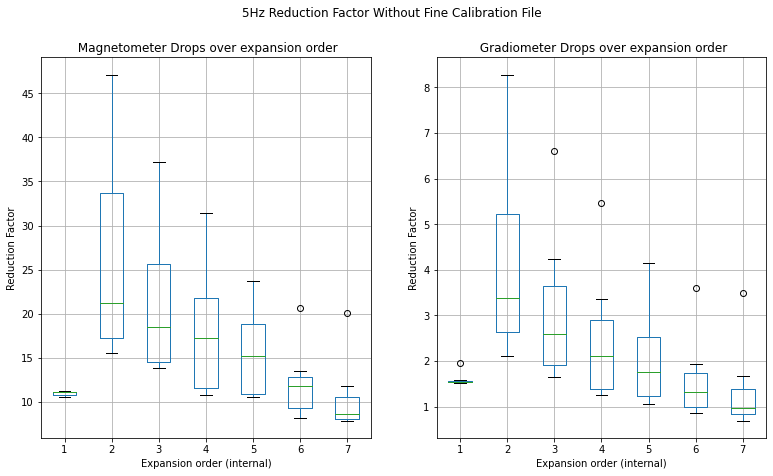

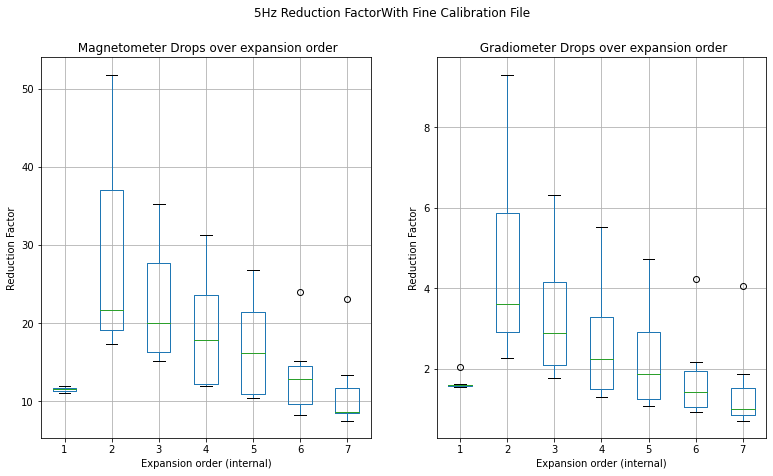

In [33]:
fig, ax = plt.subplots(1, 2, figsize=(13, 7))

fig.suptitle('5Hz Reduction Factor Without Fine Calibration File')

drop_5['mdf'].plot(
    ax=ax[0],
    kind='box',
    grid=True,
)
drop_5['gdf'].plot(
    ax=ax[1],
    kind='box',
    grid=True,
)
ax[0].set(title=' Magnetometer Drops over expansion order',
       xlabel='Expansion order (internal)',
       ylabel='Reduction Factor')
ax[1].set(title=' Gradiometer Drops over expansion order',
       xlabel='Expansion order (internal)',
       ylabel='Reduction Factor')

fig, ax = plt.subplots(1, 2, figsize=(13, 7))

fig.suptitle('5Hz Reduction FactorWith Fine Calibration File')

drop_5['mcdf'].plot(
    ax=ax[0],
    kind='box',
    grid=True,
)
drop_5['gcdf'].plot(
    ax=ax[1],
    kind='box',
    grid=True,
)
ax[0].set(title=' Magnetometer Drops over expansion order',
       xlabel='Expansion order (internal)',
       ylabel='Reduction Factor')
ax[1].set(title=' Gradiometer Drops over expansion order',
       xlabel='Expansion order (internal)',
       ylabel='Reduction Factor')

## 20Hz recording

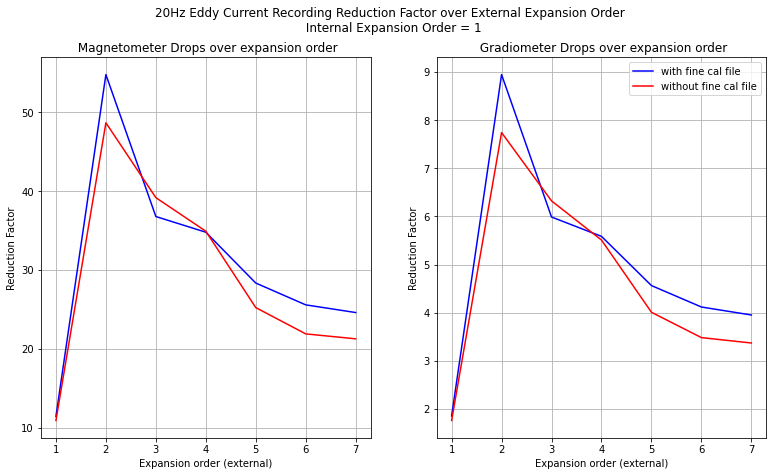

In [34]:
fig, ax = plt.subplots(1, 2, figsize=(13, 7))

data = drop_20
int_exp = 1

fig.suptitle('20Hz Eddy Current Recording Reduction Factor over External Expansion Order \n '
             'Internal Expansion Order = ' + str(int_exp))

ax[0].plot(data['mcdf'].loc[int_exp, :], 'b')
ax[0].plot(data['mdf'].loc[int_exp, :], 'r')
ax[1].plot(data['gcdf'].loc[int_exp, :], 'b')
ax[1].plot(data['gdf'].loc[int_exp, :], 'r')
plt.legend(('with fine cal file', 'without fine cal file'))
ax[0].set(title=' Magnetometer Drops over expansion order',
          xlabel='Expansion order (external)',
          ylabel='Reduction Factor')
ax[1].set(title=' Gradiometer Drops over expansion order',
          xlabel='Expansion order (external)',
          ylabel='Reduction Factor')
ax[0].grid()
ax[1].grid()

del int_exp

### Increasing Internal Expansion Order

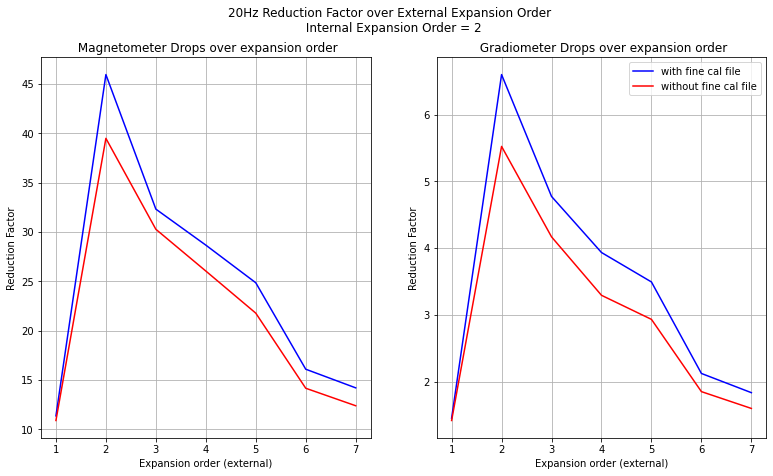

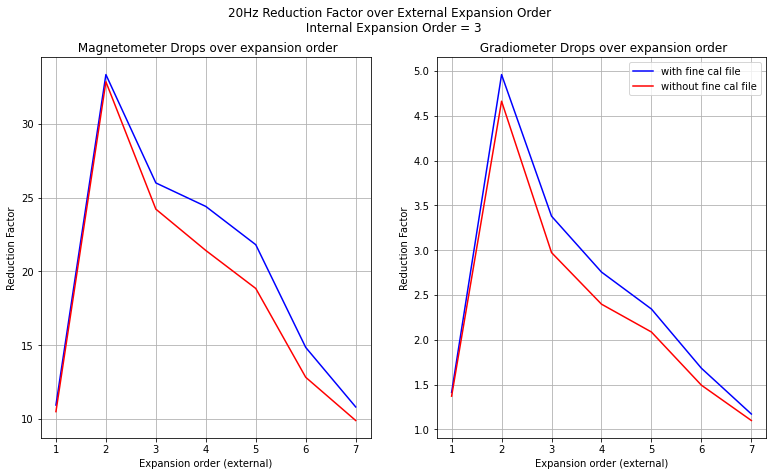

In [35]:
fig, ax = plt.subplots(1, 2, figsize=(13, 7))

int_exp = 2

fig.suptitle('20Hz Reduction Factor over External Expansion Order \n '
             'Internal Expansion Order = ' + str(int_exp))

ax[0].plot(data['mcdf'].loc[int_exp, :], 'b')
ax[0].plot(data['mdf'].loc[int_exp, :], 'r')
ax[1].plot(data['gcdf'].loc[int_exp, :], 'b')
ax[1].plot(data['gdf'].loc[int_exp, :], 'r')
plt.legend(('with fine cal file', 'without fine cal file'))
ax[0].set(title=' Magnetometer Drops over expansion order',
          xlabel='Expansion order (external)',
          ylabel='Reduction Factor')
ax[1].set(title=' Gradiometer Drops over expansion order',
          xlabel='Expansion order (external)',
          ylabel='Reduction Factor')
ax[0].grid()
ax[1].grid()

del int_exp

fig, ax = plt.subplots(1, 2, figsize=(13, 7))

int_exp = 3

fig.suptitle('20Hz Reduction Factor over External Expansion Order \n '
             'Internal Expansion Order = ' + str(int_exp))

ax[0].plot(data['mcdf'].loc[int_exp, :], 'b')
ax[0].plot(data['mdf'].loc[int_exp, :], 'r')
ax[1].plot(data['gcdf'].loc[int_exp, :], 'b')
ax[1].plot(data['gdf'].loc[int_exp, :], 'r')
plt.legend(('with fine cal file', 'without fine cal file'))
ax[0].set(title=' Magnetometer Drops over expansion order',
          xlabel='Expansion order (external)',
          ylabel='Reduction Factor')
ax[1].set(title=' Gradiometer Drops over expansion order',
          xlabel='Expansion order (external)',
          ylabel='Reduction Factor')
ax[0].grid()
ax[1].grid()

del data, int_exp

### DataFrame analysis

[Text(0.5, 1.0, ' Gradiometer Drops over expansion order'),
 Text(0.5, 0, 'Expansion order (internal)'),
 Text(0, 0.5, 'Reduction Factor')]

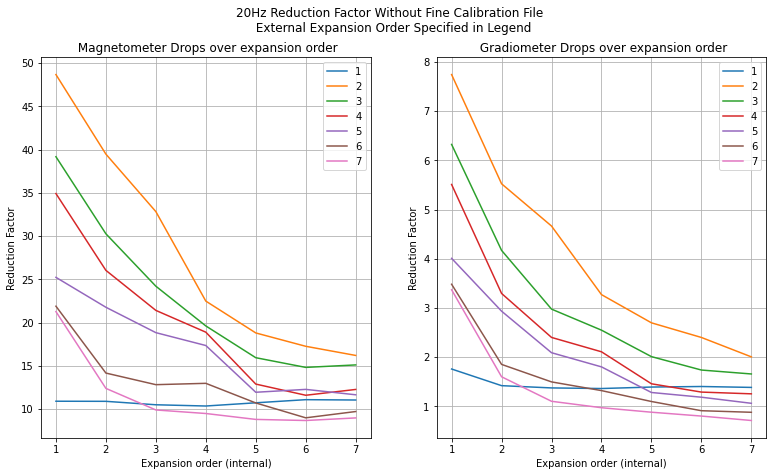

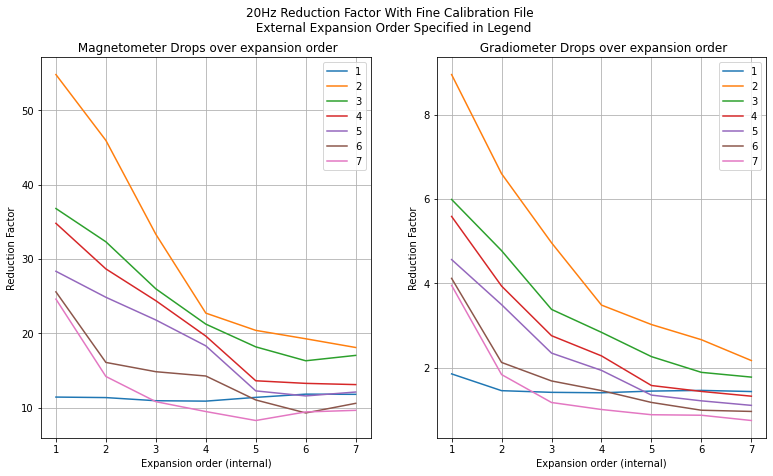

In [36]:
fig, ax = plt.subplots(1, 2, figsize=(13, 7))

fig.suptitle('20Hz Reduction Factor Without Fine Calibration File \n '
             'External Expansion Order Specified in Legend')

drop_20['mdf'].plot(
    ax=ax[0],
    kind='line',
    grid=True,
)
drop_20['gdf'].plot(
    ax=ax[1],
    kind='line',
    grid=True,
)
ax[0].set(title=' Magnetometer Drops over expansion order',
       xlabel='Expansion order (internal)',
       ylabel='Reduction Factor')
ax[1].set(title=' Gradiometer Drops over expansion order',
       xlabel='Expansion order (internal)',
       ylabel='Reduction Factor')

fig, ax = plt.subplots(1, 2, figsize=(13, 7))

fig.suptitle('20Hz Reduction Factor With Fine Calibration File \n '
             'External Expansion Order Specified in Legend')

drop_20['mcdf'].plot(
    ax=ax[0],
    kind='line',
    grid=True,
)
drop_20['gcdf'].plot(
    ax=ax[1],
    kind='line',
    grid=True,
)
ax[0].set(title=' Magnetometer Drops over expansion order',
       xlabel='Expansion order (internal)',
       ylabel='Reduction Factor')
ax[1].set(title=' Gradiometer Drops over expansion order',
       xlabel='Expansion order (internal)',
       ylabel='Reduction Factor')

Examining the same DataFrames plotted as box plots

[Text(0.5, 1.0, ' Gradiometer Drops over expansion order'),
 Text(0.5, 0, 'Expansion order (internal)'),
 Text(0, 0.5, 'Reduction Factor')]

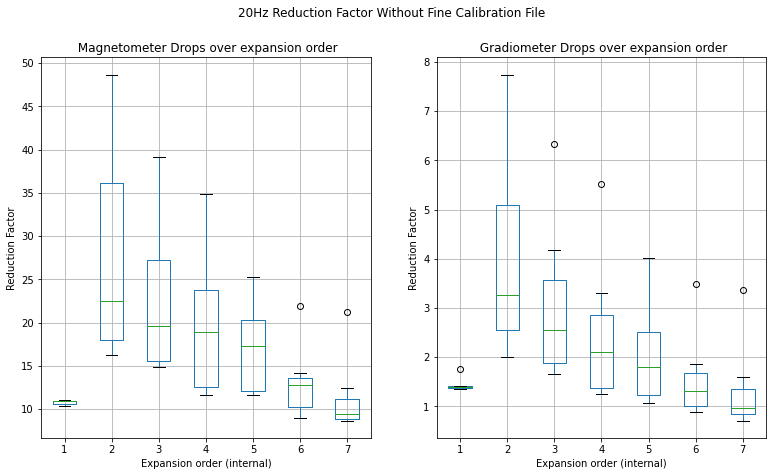

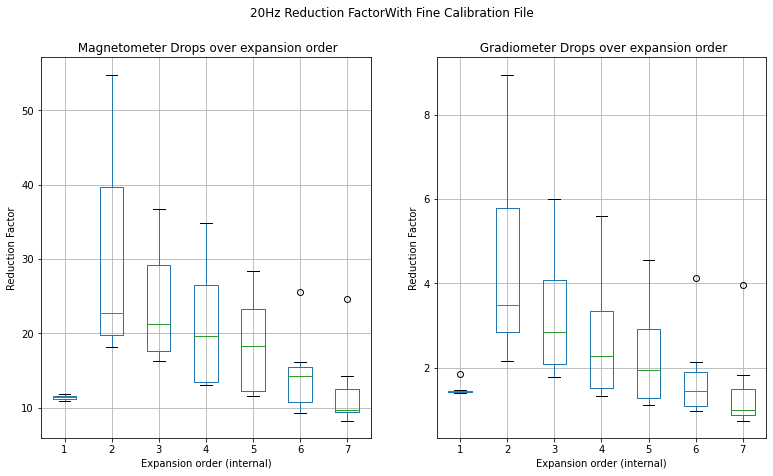

In [37]:
fig, ax = plt.subplots(1, 2, figsize=(13, 7))

fig.suptitle('20Hz Reduction Factor Without Fine Calibration File')

drop_20['mdf'].plot(
    ax=ax[0],
    kind='box',
    grid=True,
)
drop_20['gdf'].plot(
    ax=ax[1],
    kind='box',
    grid=True,
)
ax[0].set(title=' Magnetometer Drops over expansion order',
       xlabel='Expansion order (internal)',
       ylabel='Reduction Factor')
ax[1].set(title=' Gradiometer Drops over expansion order',
       xlabel='Expansion order (internal)',
       ylabel='Reduction Factor')

fig, ax = plt.subplots(1, 2, figsize=(13, 7))

fig.suptitle('20Hz Reduction FactorWith Fine Calibration File')

drop_20['mcdf'].plot(
    ax=ax[0],
    kind='box',
    grid=True,
)
drop_20['gcdf'].plot(
    ax=ax[1],
    kind='box',
    grid=True,
)
ax[0].set(title=' Magnetometer Drops over expansion order',
       xlabel='Expansion order (internal)',
       ylabel='Reduction Factor')
ax[1].set(title=' Gradiometer Drops over expansion order',
       xlabel='Expansion order (internal)',
       ylabel='Reduction Factor')

## 70Hz recording

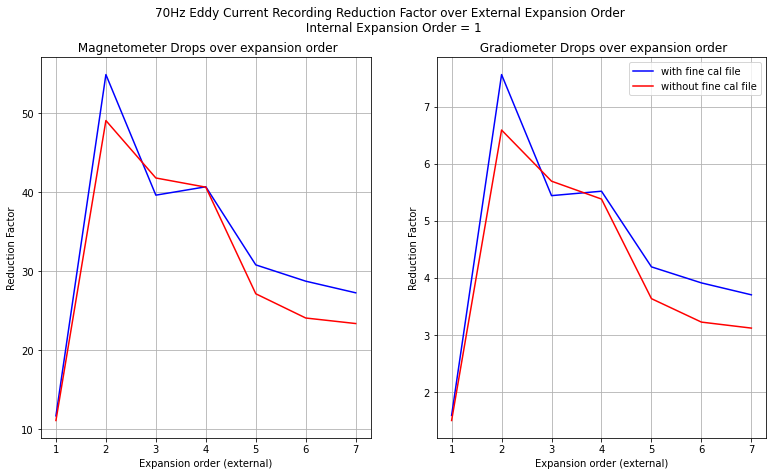

In [38]:
fig, ax = plt.subplots(1, 2, figsize=(13, 7))

data = drop_70
int_exp = 1

fig.suptitle('70Hz Eddy Current Recording Reduction Factor over External Expansion Order \n '
             'Internal Expansion Order = ' + str(int_exp))

ax[0].plot(data['mcdf'].loc[int_exp, :], 'b')
ax[0].plot(data['mdf'].loc[int_exp, :], 'r')
ax[1].plot(data['gcdf'].loc[int_exp, :], 'b')
ax[1].plot(data['gdf'].loc[int_exp, :], 'r')
plt.legend(('with fine cal file', 'without fine cal file'))
ax[0].set(title=' Magnetometer Drops over expansion order',
          xlabel='Expansion order (external)',
          ylabel='Reduction Factor')
ax[1].set(title=' Gradiometer Drops over expansion order',
          xlabel='Expansion order (external)',
          ylabel='Reduction Factor')
ax[0].grid()
ax[1].grid()

del int_exp

### Increasing Internal Expansion Order

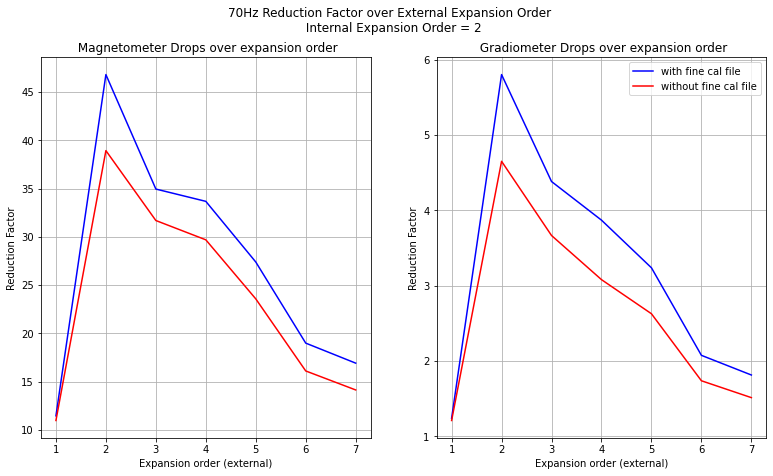

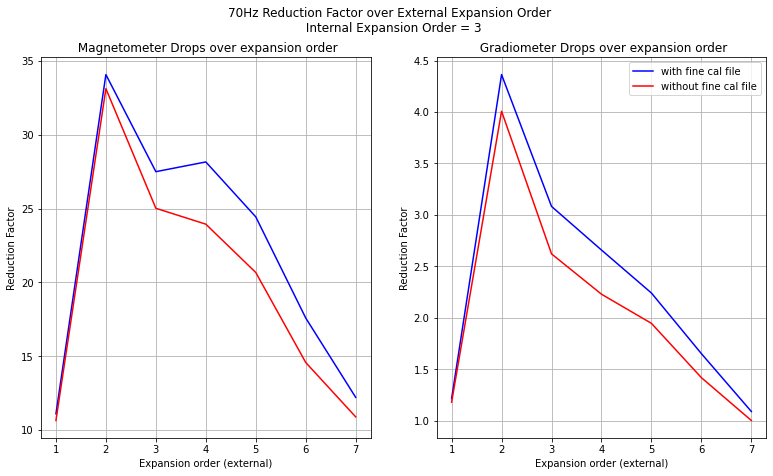

In [39]:
fig, ax = plt.subplots(1, 2, figsize=(13, 7))

int_exp = 2

fig.suptitle('70Hz Reduction Factor over External Expansion Order \n '
             'Internal Expansion Order = ' + str(int_exp))

ax[0].plot(data['mcdf'].loc[int_exp, :], 'b')
ax[0].plot(data['mdf'].loc[int_exp, :], 'r')
ax[1].plot(data['gcdf'].loc[int_exp, :], 'b')
ax[1].plot(data['gdf'].loc[int_exp, :], 'r')
plt.legend(('with fine cal file', 'without fine cal file'))
ax[0].set(title=' Magnetometer Drops over expansion order',
          xlabel='Expansion order (external)',
          ylabel='Reduction Factor')
ax[1].set(title=' Gradiometer Drops over expansion order',
          xlabel='Expansion order (external)',
          ylabel='Reduction Factor')
ax[0].grid()
ax[1].grid()

del int_exp

fig, ax = plt.subplots(1, 2, figsize=(13, 7))

int_exp = 3

fig.suptitle('70Hz Reduction Factor over External Expansion Order \n '
             'Internal Expansion Order = ' + str(int_exp))

ax[0].plot(data['mcdf'].loc[int_exp, :], 'b')
ax[0].plot(data['mdf'].loc[int_exp, :], 'r')
ax[1].plot(data['gcdf'].loc[int_exp, :], 'b')
ax[1].plot(data['gdf'].loc[int_exp, :], 'r')
plt.legend(('with fine cal file', 'without fine cal file'))
ax[0].set(title=' Magnetometer Drops over expansion order',
          xlabel='Expansion order (external)',
          ylabel='Reduction Factor')
ax[1].set(title=' Gradiometer Drops over expansion order',
          xlabel='Expansion order (external)',
          ylabel='Reduction Factor')
ax[0].grid()
ax[1].grid()

del data, int_exp

### DataFrame analysis

[Text(0.5, 1.0, ' Gradiometer Drops over expansion order'),
 Text(0.5, 0, 'Expansion order (internal)'),
 Text(0, 0.5, 'Reduction Factor')]

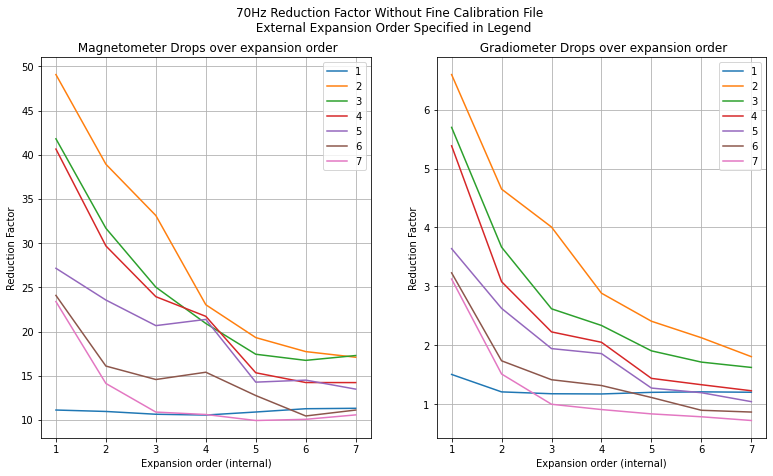

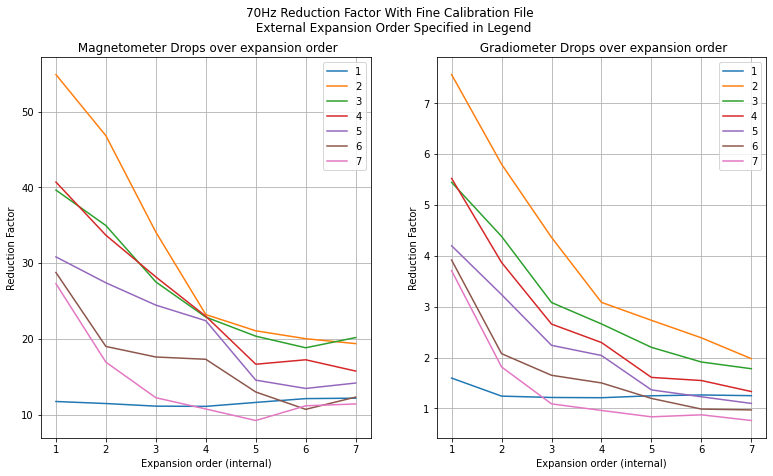

In [40]:
fig, ax = plt.subplots(1, 2, figsize=(13, 7))

fig.suptitle('70Hz Reduction Factor Without Fine Calibration File \n '
             'External Expansion Order Specified in Legend')

drop_70['mdf'].plot(
    ax=ax[0],
    kind='line',
    grid=True,
)
drop_70['gdf'].plot(
    ax=ax[1],
    kind='line',
    grid=True,
)
ax[0].set(title=' Magnetometer Drops over expansion order',
       xlabel='Expansion order (internal)',
       ylabel='Reduction Factor')
ax[1].set(title=' Gradiometer Drops over expansion order',
       xlabel='Expansion order (internal)',
       ylabel='Reduction Factor')

fig, ax = plt.subplots(1, 2, figsize=(13, 7))

fig.suptitle('70Hz Reduction Factor With Fine Calibration File \n '
             'External Expansion Order Specified in Legend')

drop_70['mcdf'].plot(
    ax=ax[0],
    kind='line',
    grid=True,
)
drop_70['gcdf'].plot(
    ax=ax[1],
    kind='line',
    grid=True,
)
ax[0].set(title=' Magnetometer Drops over expansion order',
       xlabel='Expansion order (internal)',
       ylabel='Reduction Factor')
ax[1].set(title=' Gradiometer Drops over expansion order',
       xlabel='Expansion order (internal)',
       ylabel='Reduction Factor')

Examining the same DataFrames plotted as box plots

[Text(0.5, 1.0, ' Gradiometer Drops over expansion order'),
 Text(0.5, 0, 'Expansion order (internal)'),
 Text(0, 0.5, 'Reduction Factor')]

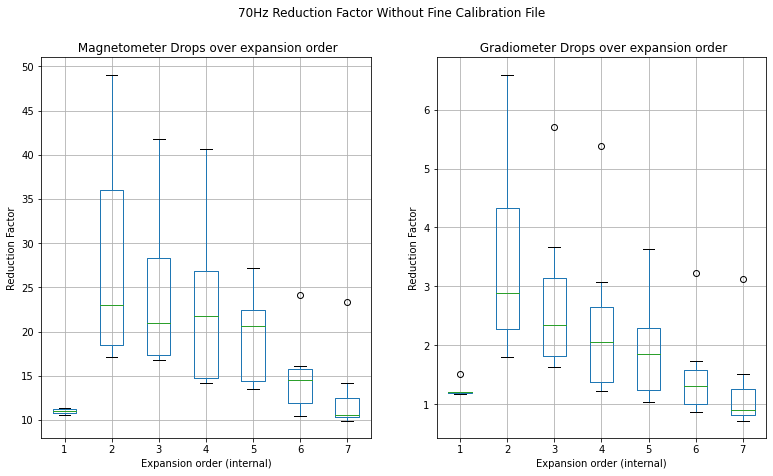

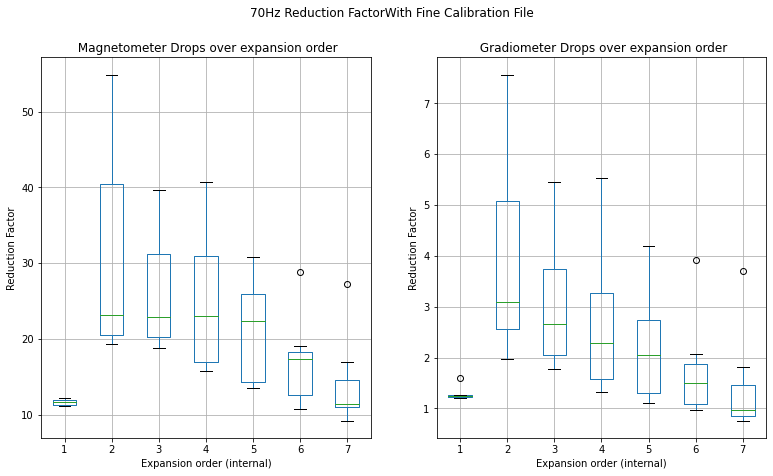

In [41]:
fig, ax = plt.subplots(1, 2, figsize=(13, 7))

fig.suptitle('70Hz Reduction Factor Without Fine Calibration File')

drop_70['mdf'].plot(
    ax=ax[0],
    kind='box',
    grid=True,
)
drop_70['gdf'].plot(
    ax=ax[1],
    kind='box',
    grid=True,
)
ax[0].set(title=' Magnetometer Drops over expansion order',
       xlabel='Expansion order (internal)',
       ylabel='Reduction Factor')
ax[1].set(title=' Gradiometer Drops over expansion order',
       xlabel='Expansion order (internal)',
       ylabel='Reduction Factor')

fig, ax = plt.subplots(1, 2, figsize=(13, 7))

fig.suptitle('70Hz Reduction FactorWith Fine Calibration File')

drop_70['mcdf'].plot(
    ax=ax[0],
    kind='box',
    grid=True,
)
drop_70['gcdf'].plot(
    ax=ax[1],
    kind='box',
    grid=True,
)
ax[0].set(title=' Magnetometer Drops over expansion order',
       xlabel='Expansion order (internal)',
       ylabel='Reduction Factor')
ax[1].set(title=' Gradiometer Drops over expansion order',
       xlabel='Expansion order (internal)',
       ylabel='Reduction Factor')

## 105Hz recording

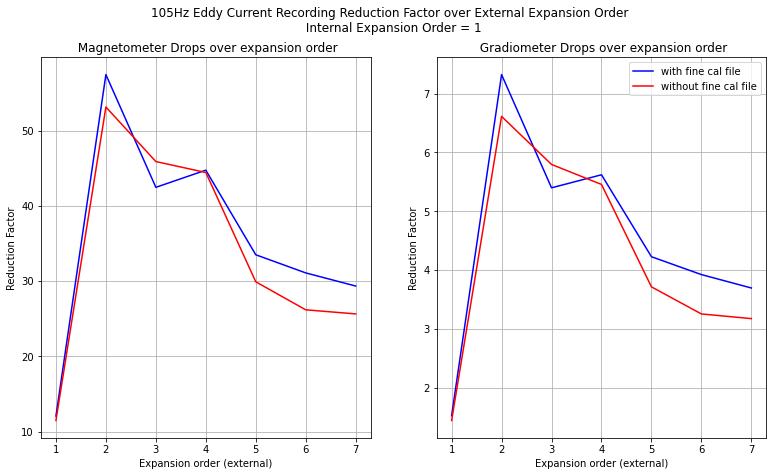

In [42]:
fig, ax = plt.subplots(1, 2, figsize=(13, 7))

data = drop_105
int_exp = 1

fig.suptitle('105Hz Eddy Current Recording Reduction Factor over External Expansion Order \n '
             'Internal Expansion Order = ' + str(int_exp))

ax[0].plot(data['mcdf'].loc[int_exp, :], 'b')
ax[0].plot(data['mdf'].loc[int_exp, :], 'r')
ax[1].plot(data['gcdf'].loc[int_exp, :], 'b')
ax[1].plot(data['gdf'].loc[int_exp, :], 'r')
plt.legend(('with fine cal file', 'without fine cal file'))
ax[0].set(title=' Magnetometer Drops over expansion order',
          xlabel='Expansion order (external)',
          ylabel='Reduction Factor')
ax[1].set(title=' Gradiometer Drops over expansion order',
          xlabel='Expansion order (external)',
          ylabel='Reduction Factor')
ax[0].grid()
ax[1].grid()

del int_exp

### Increasing Internal Expansion Order

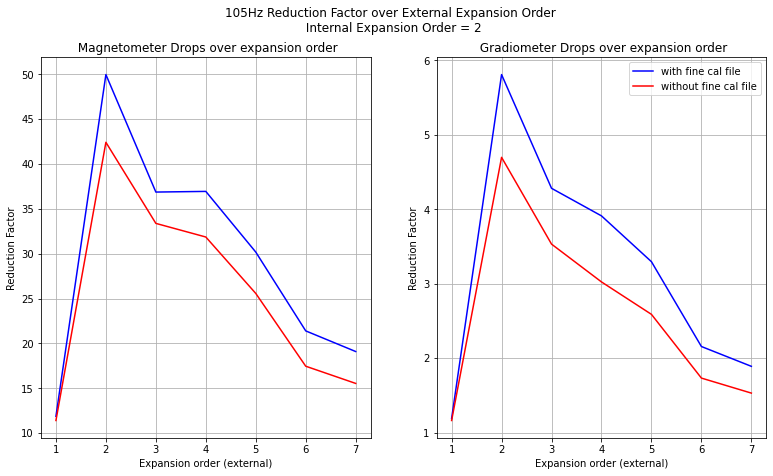

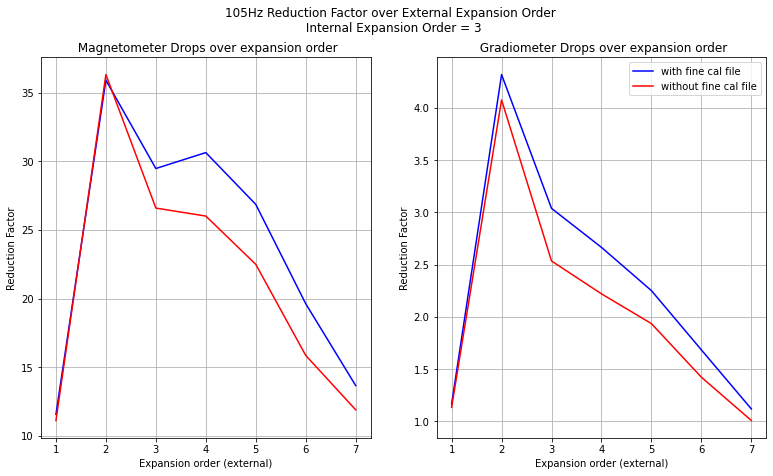

In [43]:
fig, ax = plt.subplots(1, 2, figsize=(13, 7))

int_exp = 2

fig.suptitle('105Hz Reduction Factor over External Expansion Order \n '
             'Internal Expansion Order = ' + str(int_exp))

ax[0].plot(data['mcdf'].loc[int_exp, :], 'b')
ax[0].plot(data['mdf'].loc[int_exp, :], 'r')
ax[1].plot(data['gcdf'].loc[int_exp, :], 'b')
ax[1].plot(data['gdf'].loc[int_exp, :], 'r')
plt.legend(('with fine cal file', 'without fine cal file'))
ax[0].set(title=' Magnetometer Drops over expansion order',
          xlabel='Expansion order (external)',
          ylabel='Reduction Factor')
ax[1].set(title=' Gradiometer Drops over expansion order',
          xlabel='Expansion order (external)',
          ylabel='Reduction Factor')
ax[0].grid()
ax[1].grid()

del int_exp

fig, ax = plt.subplots(1, 2, figsize=(13, 7))

int_exp = 3

fig.suptitle('105Hz Reduction Factor over External Expansion Order \n '
             'Internal Expansion Order = ' + str(int_exp))

ax[0].plot(data['mcdf'].loc[int_exp, :], 'b')
ax[0].plot(data['mdf'].loc[int_exp, :], 'r')
ax[1].plot(data['gcdf'].loc[int_exp, :], 'b')
ax[1].plot(data['gdf'].loc[int_exp, :], 'r')
plt.legend(('with fine cal file', 'without fine cal file'))
ax[0].set(title=' Magnetometer Drops over expansion order',
          xlabel='Expansion order (external)',
          ylabel='Reduction Factor')
ax[1].set(title=' Gradiometer Drops over expansion order',
          xlabel='Expansion order (external)',
          ylabel='Reduction Factor')
ax[0].grid()
ax[1].grid()

del data, int_exp

### DataFrame analysis

[Text(0.5, 1.0, ' Gradiometer Drops over expansion order'),
 Text(0.5, 0, 'Expansion order (internal)'),
 Text(0, 0.5, 'Reduction Factor')]

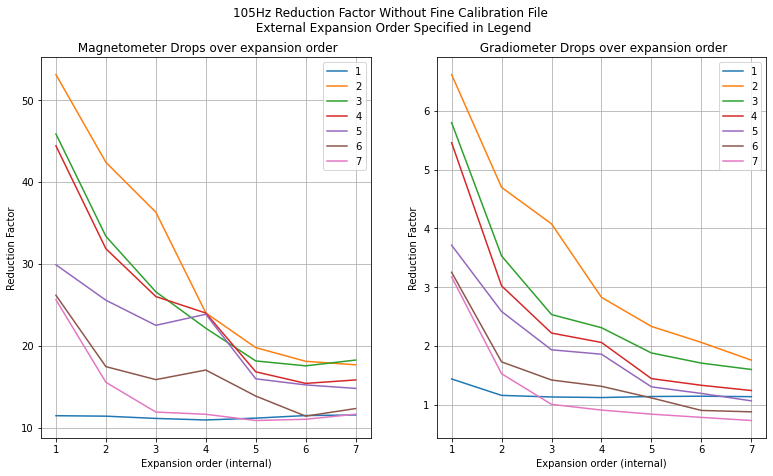

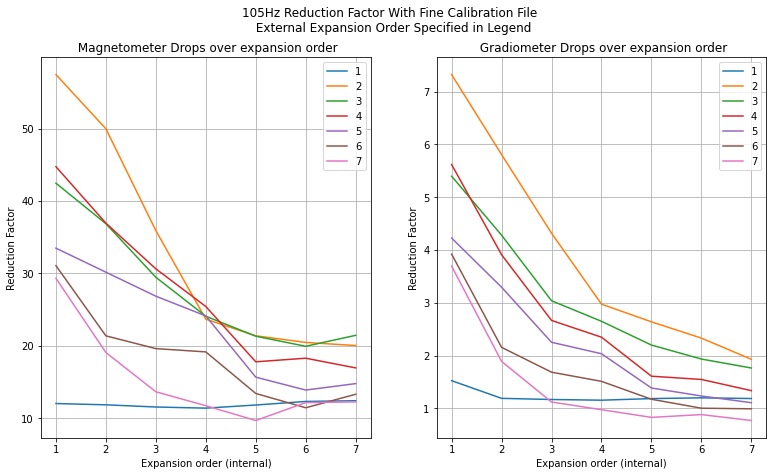

In [44]:
fig, ax = plt.subplots(1, 2, figsize=(13, 7))

fig.suptitle('105Hz Reduction Factor Without Fine Calibration File \n '
             'External Expansion Order Specified in Legend')

drop_105['mdf'].plot(
    ax=ax[0],
    kind='line',
    grid=True,
)
drop_105['gdf'].plot(
    ax=ax[1],
    kind='line',
    grid=True,
)
ax[0].set(title=' Magnetometer Drops over expansion order',
       xlabel='Expansion order (internal)',
       ylabel='Reduction Factor')
ax[1].set(title=' Gradiometer Drops over expansion order',
       xlabel='Expansion order (internal)',
       ylabel='Reduction Factor')

fig, ax = plt.subplots(1, 2, figsize=(13, 7))

fig.suptitle('105Hz Reduction Factor With Fine Calibration File \n '
             'External Expansion Order Specified in Legend')

drop_105['mcdf'].plot(
    ax=ax[0],
    kind='line',
    grid=True,
)
drop_105['gcdf'].plot(
    ax=ax[1],
    kind='line',
    grid=True,
)
ax[0].set(title=' Magnetometer Drops over expansion order',
       xlabel='Expansion order (internal)',
       ylabel='Reduction Factor')
ax[1].set(title=' Gradiometer Drops over expansion order',
       xlabel='Expansion order (internal)',
       ylabel='Reduction Factor')

Examining the same DataFrames plotted as box plots

[Text(0.5, 1.0, ' Gradiometer Drops over expansion order'),
 Text(0.5, 0, 'Expansion order (internal)'),
 Text(0, 0.5, 'Reduction Factor')]

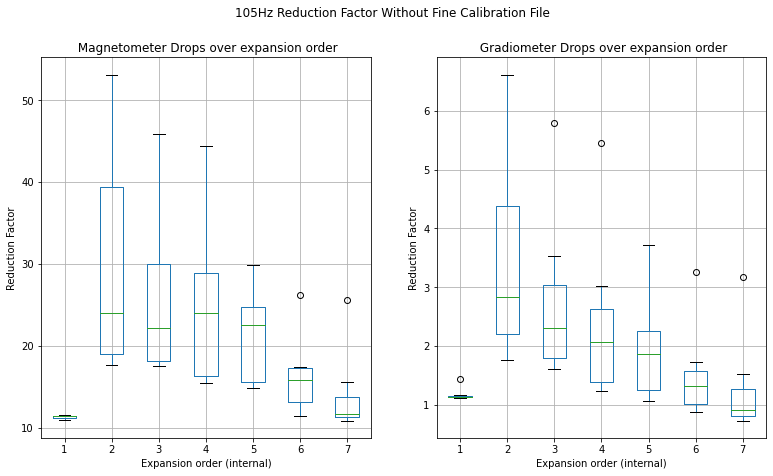

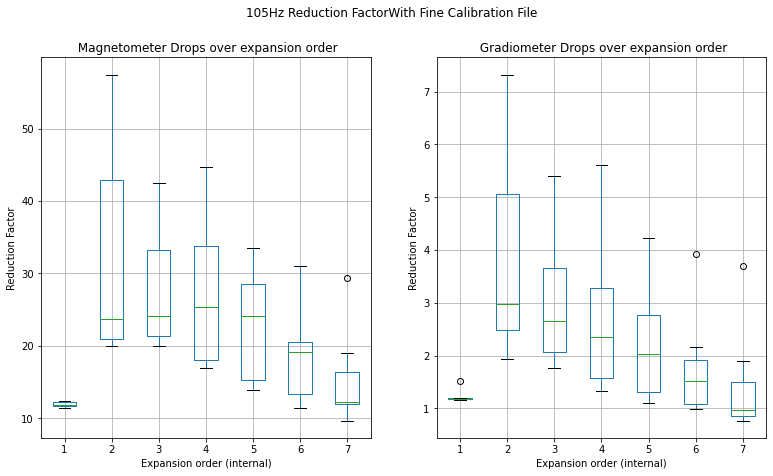

In [45]:
fig, ax = plt.subplots(1, 2, figsize=(13, 7))

fig.suptitle('105Hz Reduction Factor Without Fine Calibration File')

drop_105['mdf'].plot(
    ax=ax[0],
    kind='box',
    grid=True,
)
drop_105['gdf'].plot(
    ax=ax[1],
    kind='box',
    grid=True,
)
ax[0].set(title=' Magnetometer Drops over expansion order',
       xlabel='Expansion order (internal)',
       ylabel='Reduction Factor')
ax[1].set(title=' Gradiometer Drops over expansion order',
       xlabel='Expansion order (internal)',
       ylabel='Reduction Factor')

fig, ax = plt.subplots(1, 2, figsize=(13, 7))

fig.suptitle('105Hz Reduction FactorWith Fine Calibration File')

drop_105['mcdf'].plot(
    ax=ax[0],
    kind='box',
    grid=True,
)
drop_105['gcdf'].plot(
    ax=ax[1],
    kind='box',
    grid=True,
)
ax[0].set(title=' Magnetometer Drops over expansion order',
       xlabel='Expansion order (internal)',
       ylabel='Reduction Factor')
ax[1].set(title=' Gradiometer Drops over expansion order',
       xlabel='Expansion order (internal)',
       ylabel='Reduction Factor')
